In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

Here we read our admissions data to a dataframe via pandas, also do some preliminary investigation to understand the columns, data types and general shape of our dataframe.

In [8]:
admission_data = pd.read_csv("admissions_data.csv")
print(admission_data.head(5))
print(admission_data.info())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 

Next we must determine exactly what we are trying to predict, as you can imagine we are trying to determine what factors determine an individuals chance of admission, hence our label is the "chance of admit" column of our dataframe and our features are the other columns. We capture these into our feature and labels parameters via iloc.

In [44]:
features = admission_data.iloc[:,1:-1]
labels = admission_data.iloc[:, -1]
labels

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

Given we are creating a learning model we must now split our data into training and testing components, we do this via using scikit learns train test split function as shown. we keep the naming convention the same as our parameters and implement a test split of 30% and random state of 42.

In [45]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state = 42)

Given the substantial differences in the range of the test components in the labels component we must standardize or normalize to ensure the larger ones dont adversly effect the model, hence we implement standard scaler, in particular fit_transform to scale our data appropriately.

In [46]:
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

Next we construct our deep learning model, this is a neural network model, for this particular model we have implemented to hidden dense layers with 16 and 8 neurons respectively, also a dropout layer. 

In [57]:
model = Sequential()
model.add(InputLayer(input_shape = (features_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

Next we select our optimizer which in this case is Adam and we compile our model with this as well as mean-squared error as our loss function and mean-average error as our metrics given we are creating a regression model.

In [58]:
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

We now fit our model, this is done via using 100 epochs, a batch size of 5 and a validation split of .25, these are just testing values and via hyperparameter tuning one can obviously optimize these. We also evaluate its performance via finding the resultant mean-squared error and mean-average error

In [70]:
history = model.fit(features_train, labels_train, epochs=100, batch_size=5, verbose=1, validation_split=0.25)
res_mse, res_mae = model.evaluate(features_test, labels_test)
print("mean squared error= ", res_mse)
print("mean average error= ", res_mae)

Epoch 1/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0209 - mae: 0.1173 - val_loss: 0.0207 - val_mae: 0.1194
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.1143 - val_loss: 0.0224 - val_mae: 0.1233
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0206 - mae: 0.1184 - val_loss: 0.0270 - val_mae: 0.1363
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0201 - mae: 0.1171 - val_loss: 0.0209 - val_mae: 0.1200
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0191 - mae: 0.1129 - val_loss: 0.0209 - val_mae: 0.1200
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0213 - mae: 0.1185 - val_loss: 0.0218 - val_mae: 0.1218
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0211 - mae: 0.1174 - val_loss: 0.0256 - val_mae: 0.1325
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0201 - m

Finally for visual purposes we construct a plot showing the correlation between our models train and test components looking at the resultant mean average error and the loss

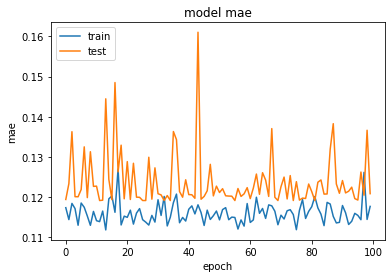

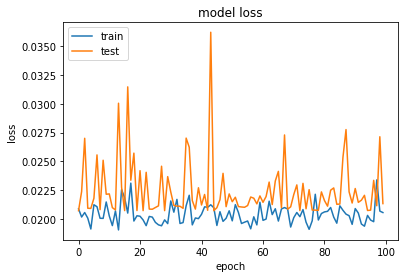

In [76]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
